<h1 style='color:red;text-align:center;'>Rainfall Prediction using Machine Learning – Python</h1>

<h2 style='color:red;'>1.Introduction</h2>
<h3>Problem Statement</h3>
    <p>
        Analyze weather data over a 5-day period to identify patterns and correlations between various meteorological factors such as pressure, temperature, humidity, and rainfall. This can help in understanding how these variables influence daily weather conditions.
    </p>
    <h3>Dataset Description</h3>
    <p>The dataset captures weather data over five days with the following features:</p>
    <ul>
        <li><strong>day</strong>: Sequential day number.</li>
        <li><strong>pressure (hPa)</strong>: Atmospheric pressure measured in hectopascals.</li>
        <li><strong>maxtemp (°C)</strong>: Maximum temperature recorded on the day.</li>
        <li><strong>temperature (°C)</strong>: Average temperature of the day.</li>
        <li><strong>mintemp (°C)</strong>: Minimum temperature recorded on the day.</li>
        <li><strong>dewpoint (°C)</strong>: Temperature at which air becomes saturated with moisture.</li>
        <li><strong>humidity (%)</strong>: Relative humidity percentage.</li>
        <li><strong>cloud (%)</strong>: Cloud cover percentage.</li>
        <li><strong>rainfall</strong>: Indicates if rainfall occurred ("yes"/"no").</li>
        <li><strong>sunshine (hours)</strong>: Total sunshine hours.</li>
        <li><strong>winddirection (°)</strong>: Direction of the wind in degrees.</li>
        <li><strong>windspeed (km/h)</strong>: Speed of the wind.</li>
    </ul>
    <p>This dataset is ideal for basic weather pattern analysis and visualization.</p>

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import preprocessing as ps
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


<h2 style='color:red;'>2.Basic Overview Of Data</h2>

In [3]:
ps.dataset_analysis(df,'rainfall')

Dataset Shape (Rows & Columns)
Rows :- 366
Columns :- 12
Unique Rows: 366 (100.00%)
Duplicate Rows: 0 (0.00%)

Columns with Null Values and Null Value Counts
         winddirection: 1 null values
windspeed: 1 null values

Data Type Wise Column Count
float64    8
int64      3
object     1
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : rainfall


Discrete Numeric Columns : -----


Continuous Columns : day, pressure , maxtemp, temparature, mintemp, dewpoint, humidity , cloud , sunshine,          winddirection, windspeed


Unknown Columns : -----

Skewness of Numerical Columns
day: 0.00 -> Approximately Symmetric. 
pressure : 0.33 -> Approximately Symmetric. 
maxtemp: -0.53 -> Mild Negative Skew. 
temparature: -0.63 -> Mild Negative Skew. 
mintemp: -0.71 -> Mild Negative Skew. 
dewpoint: -1.05 -> Strong Negative Skew. Consider transformation (e.g., log or square root)
humidity : -1.06 -> Strong Negative Skew. Consider transformation (e.g., log or sq

<p><strong>The dataset consists of 366 unique rows and 12 columns. Initial analysis indicates the presence of two null values and a few strongly positively skewed columns. Additionally, the target variable is imbalanced, which may require addressing during the analysis phase to ensure accurate modeling and insights.</strong></p>

<h2 style='color:red;'>3.EDA(Exploratory Data Analysis)</h2>

In [4]:
df=df.dropna()
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [5]:
df.columns = df.columns.str.strip()

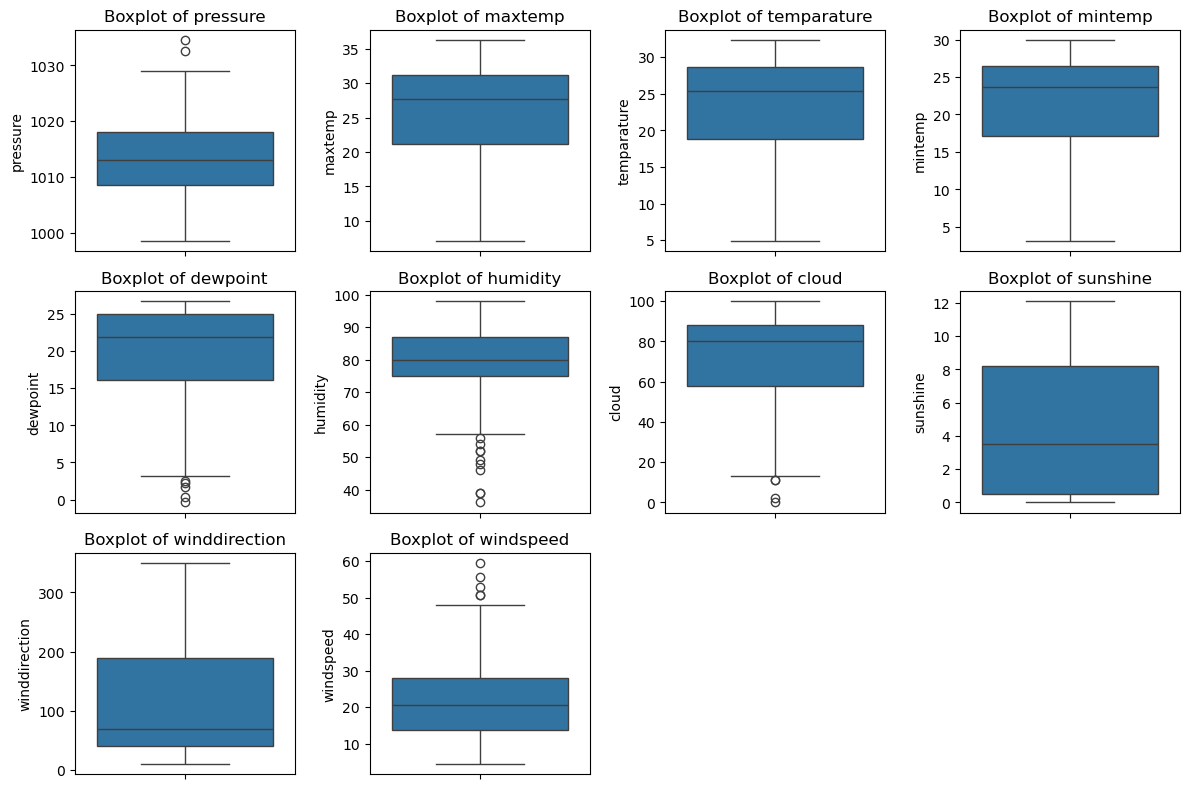

In [6]:
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
            'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


plt.figure(figsize=(12, 8)) 
for i, col in enumerate(features):
    plt.subplot(3, 4, i+1)  
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout() 
plt.show()

In [7]:
df.skew(numeric_only=True)

day             -0.000603
pressure         0.326400
maxtemp         -0.527078
temparature     -0.628635
mintemp         -0.708821
dewpoint        -1.046680
humidity        -1.051788
cloud           -1.074288
sunshine         0.363995
winddirection    0.805962
windspeed        0.778895
dtype: float64

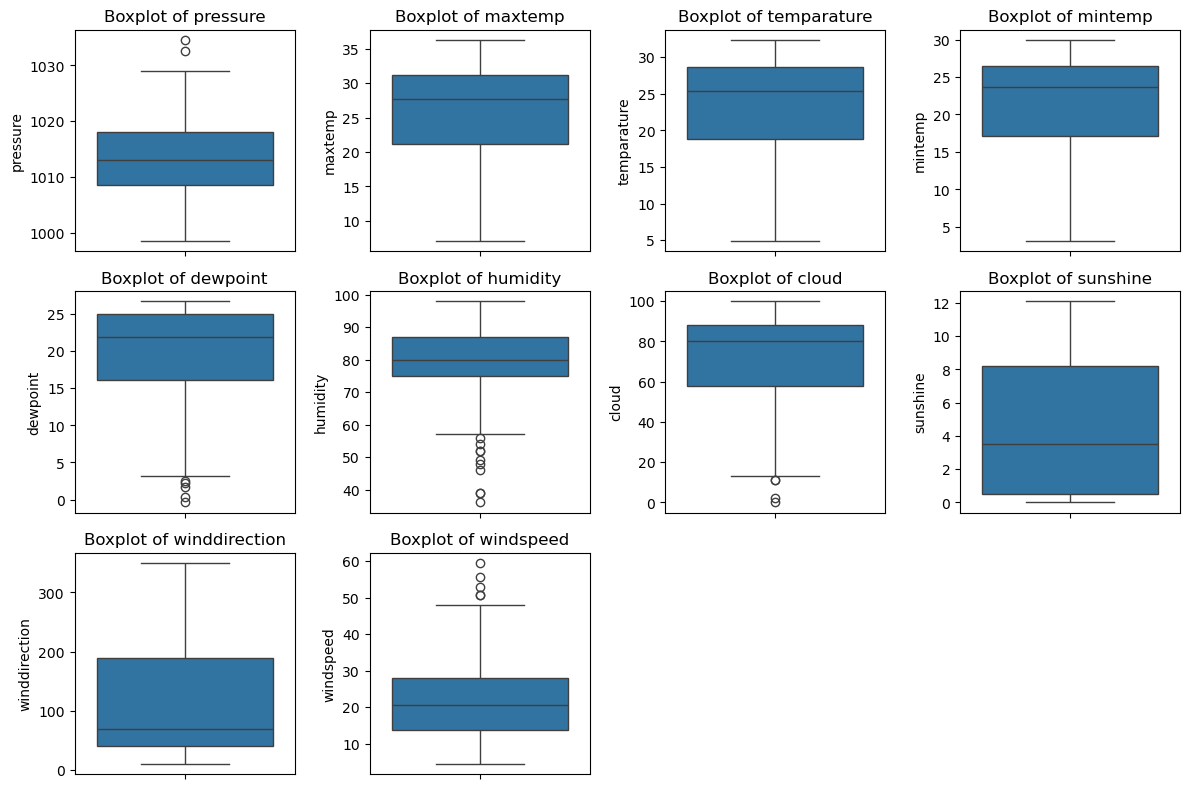

In [8]:
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
            'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


plt.figure(figsize=(12, 8)) 
for i, col in enumerate(features):
    plt.subplot(3, 4, i+1)  
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout() 
plt.show()

<Axes: xlabel='rainfall'>

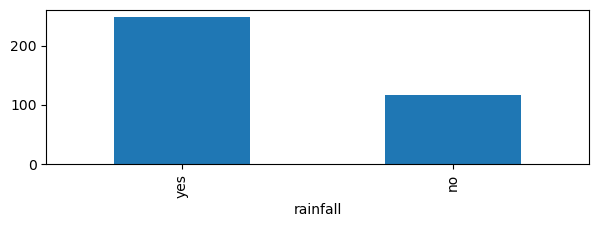

In [9]:
plt.figure(figsize=(7,2))
df['rainfall'].value_counts().plot(kind='bar')

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['rainfall']=encoder.fit_transform(df['rainfall'])
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [11]:
df.corr()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
day,1.000000,0.042125,-0.015136,-0.012458,-0.007484,-0.049619,-0.117584,-0.112503,0.011796,0.110170,0.042203,-0.031906
pressure,0.042125,1.000000,-0.828670,-0.851628,-0.839583,-0.859880,-0.273631,0.006881,-0.087161,-0.196850,-0.662586,0.374046
maxtemp,-0.015136,-0.828670,1.000000,0.986189,0.961461,0.899588,0.020450,-0.291071,-0.102922,0.506863,0.629555,-0.442357
temparature,-0.012458,-0.851628,0.986189,1.000000,0.990173,0.936769,0.090893,-0.206894,-0.038905,0.419919,0.648865,-0.393739
mintemp,-0.007484,-0.839583,0.961461,0.990173,1.000000,0.944409,0.137901,-0.157112,-0.009294,0.367565,0.633513,-0.359130
dewpoint,-0.049619,-0.859880,0.899588,0.936769,0.944409,1.000000,0.424493,0.043753,0.138386,0.184151,0.628190,-0.378435
humidity,-0.117584,-0.273631,0.020450,0.090893,0.137901,0.424493,1.000000,0.655338,0.489075,-0.564896,0.101237,-0.076613
cloud,-0.112503,0.006881,-0.291071,-0.206894,-0.157112,0.043753,0.655338,1.000000,0.625602,-0.849337,-0.076168,0.258400
rainfall,0.011796,-0.087161,-0.102922,-0.038905,-0.009294,0.138386,0.489075,0.625602,1.000000,-0.554083,-0.013214,0.154488
sunshine,0.110170,-0.196850,0.506863,0.419919,0.367565,0.184151,-0.564896,-0.849337,-0.554083,1.000000,0.253261,-0.298892


<Axes: >

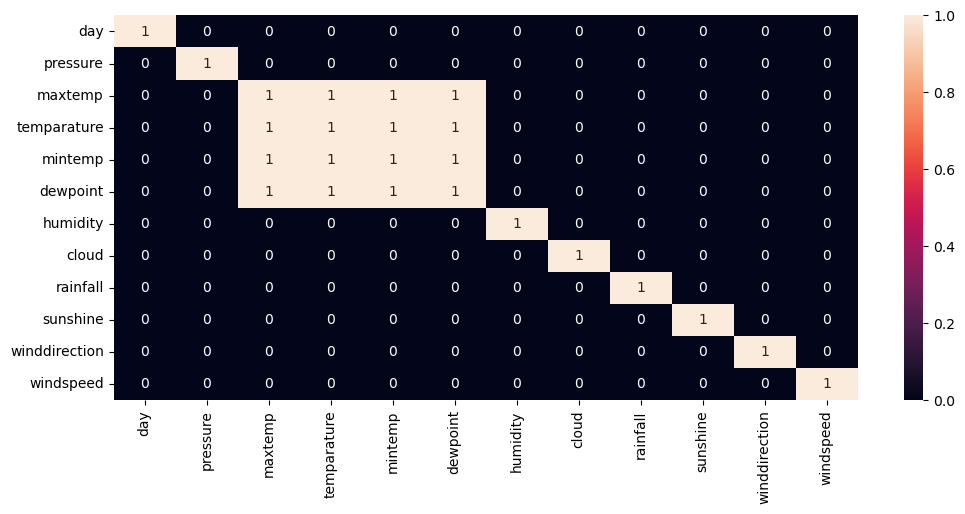

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr()>0.80,annot=True)

In [13]:
df=df.drop(['maxtemp','mintemp'],axis=1)

<Axes: >

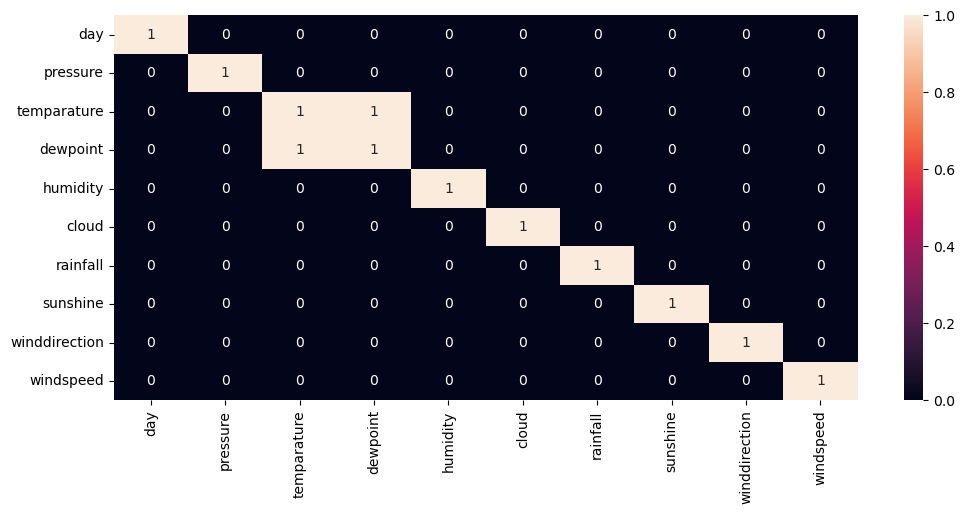

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr()>0.80,annot=True)

In [15]:
df.corr().style.background_gradient(cmap='viridis', subset=['rainfall'])

,day,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
day,1.000000,0.042125,-0.012458,-0.049619,-0.117584,-0.112503,0.011796,0.110170,0.042203,-0.031906
pressure,0.042125,1.000000,-0.851628,-0.859880,-0.273631,0.006881,-0.087161,-0.196850,-0.662586,0.374046
temparature,-0.012458,-0.851628,1.000000,0.936769,0.090893,-0.206894,-0.038905,0.419919,0.648865,-0.393739
dewpoint,-0.049619,-0.859880,0.936769,1.000000,0.424493,0.043753,0.138386,0.184151,0.628190,-0.378435
humidity,-0.117584,-0.273631,0.090893,0.424493,1.000000,0.655338,0.489075,-0.564896,0.101237,-0.076613
cloud,-0.112503,0.006881,-0.206894,0.043753,0.655338,1.000000,0.625602,-0.849337,-0.076168,0.258400
rainfall,0.011796,-0.087161,-0.038905,0.138386,0.489075,0.625602,1.000000,-0.554083,-0.013214,0.154488
sunshine,0.110170,-0.196850,0.419919,0.184151,-0.564896,-0.849337,-0.554083,1.000000,0.253261,-0.298892
winddirection,0.042203,-0.662586,0.648865,0.628190,0.101237,-0.076168,-0.013214,0.253261,1.000000,-0.219962
windspeed,-0.031906,0.374046,-0.393739,-0.378435,-0.076613,0.258400,0.154488,-0.298892,-0.219962,1.000000


In [16]:
x=df[['pressure','temparature','dewpoint','humidity', 'cloud', 'sunshine','winddirection','windspeed']]
x_copy=x
y=df['rainfall']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


scaler = StandardScaler()
x = scaler.fit_transform(x)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
x, y = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
def train_model(model, model_name):
    print(f'Model: {model_name}')
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'Training Accuracy Score: {train_accuracy:.2f}')
    print(f'Testing Accuracy Score: {test_accuracy:.2f}')
    
    # Generate classification report for testing data
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:')
    print(report)
    
    return model

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary for the models
model_list = dict(
    knn=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2),
    svc=SVC(kernel='linear', random_state=0),
    logistic=LogisticRegression(),
    naive=GaussianNB(),
    tree=DecisionTreeClassifier(criterion='entropy', random_state=0),
    forest=RandomForestClassifier(n_estimators=50, criterion="entropy"),
    xgboost=XGBClassifier(),
    gradientboost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)
)

# Store evaluation results in a list
results = []

# Assuming X_train, y_train, X_test, y_test are already defined
for key, model in model_list.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics in the results list
    results.append({
        'Model': key,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

model_metrics_df = pd.DataFrame(results)


sorted_df = model_metrics_df.sort_values(by='Accuracy', ascending=False)

styled_df = sorted_df.style.background_gradient(cmap='viridis', subset=['Accuracy'])

styled_df

,Model,Accuracy,Precision,Recall,F1-Score
5,forest,0.895161,0.896045,0.899685,0.894991
0,knn,0.862903,0.868980,0.856092,0.859607
6,xgboost,0.846774,0.852972,0.853992,0.846764
4,tree,0.838710,0.837500,0.840336,0.838036
1,svc,0.798387,0.811985,0.808298,0.798269
2,logistic,0.790323,0.801587,0.799370,0.790268
7,gradientboost,0.782258,0.788034,0.788866,0.782244
3,naive,0.774194,0.789530,0.784664,0.773958


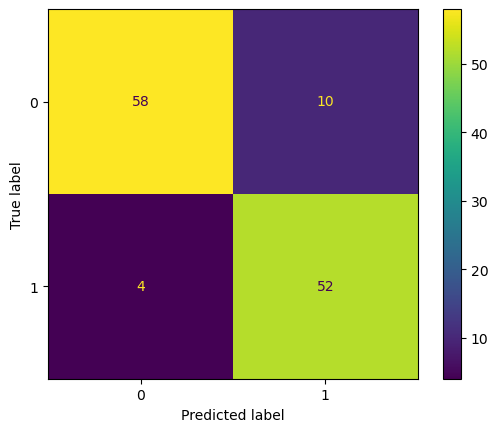

In [37]:
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
model=RandomForestClassifier(n_estimators=50, criterion="entropy")
model.fit(x_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.show()



In [38]:
importances = model.feature_importances_

# Create a DataFrame to view features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': x_copy.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
feature_importance_df

,Feature,Importance
5,sunshine,0.204205
4,cloud,0.200462
3,humidity,0.149784
2,dewpoint,0.106906
0,pressure,0.096239
7,windspeed,0.094592
1,temparature,0.084027
6,winddirection,0.063786


In [39]:
from sklearn.neural_network import MLPClassifier

# Create an ANN model (MLPClassifier)
ann_model = MLPClassifier(hidden_layer_sizes=(64, 32),learning_rate='invscaling', max_iter=1000, random_state=42)

# Train the model
ann_model.fit(x_train, y_train)

# Predict on the test set
y_pred = ann_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics"
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8871
Precision: 0.8621
Recall: 0.8929
F1 Score: 0.8772
